# Data Analysis Workflow Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
data = pd.read_csv("Data.csv", index_col='Date', parse_dates=True)

In [3]:
# Checking the data
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


<AxesSubplot:xlabel='Date'>

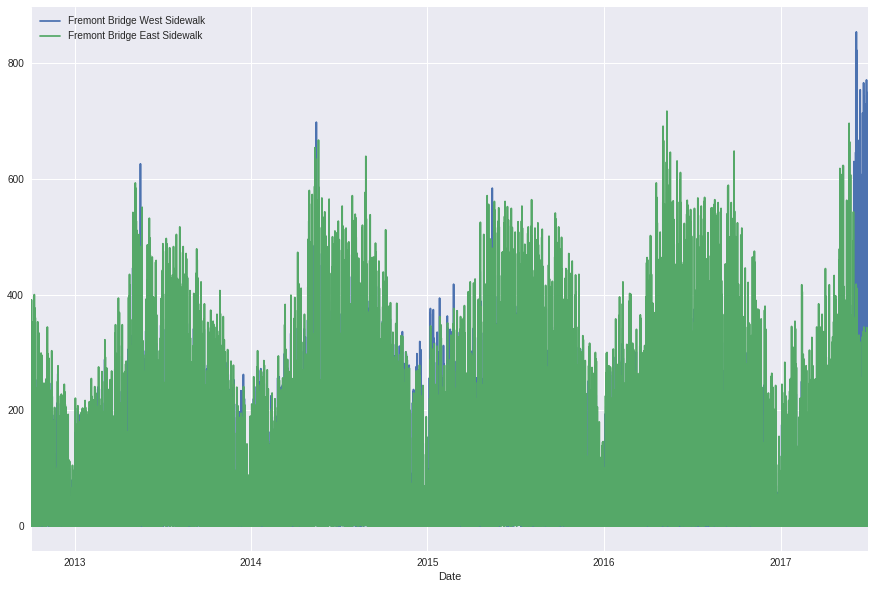

In [4]:
# Visualizing our data

data.plot()

<AxesSubplot:xlabel='Date'>

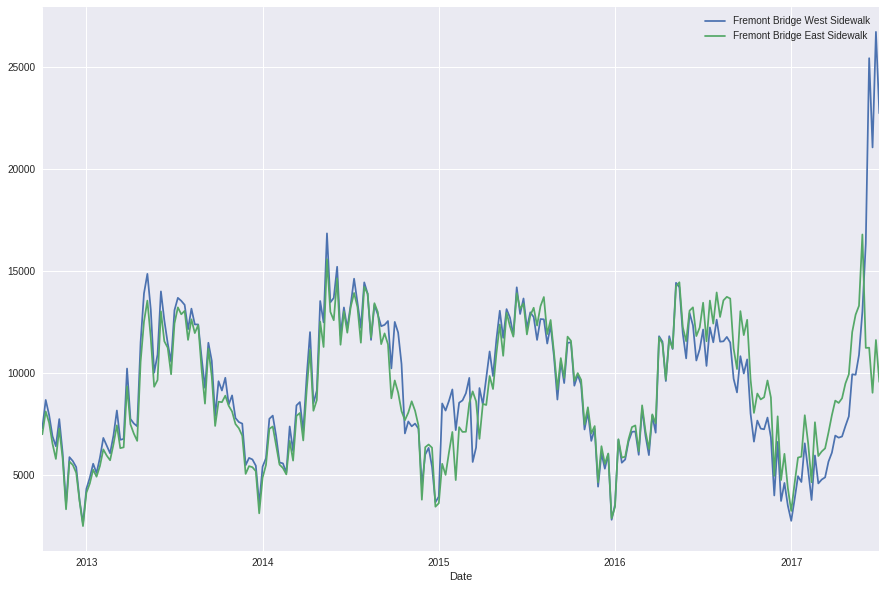

In [5]:
# the above diagram shows that the data is too much to visualize
# therefore, we will try to see the weekly data
data.resample('W').sum().plot()

We will now go deeper into this visualization for further analysis.
First we will change the visualization style.

<AxesSubplot:xlabel='Date'>

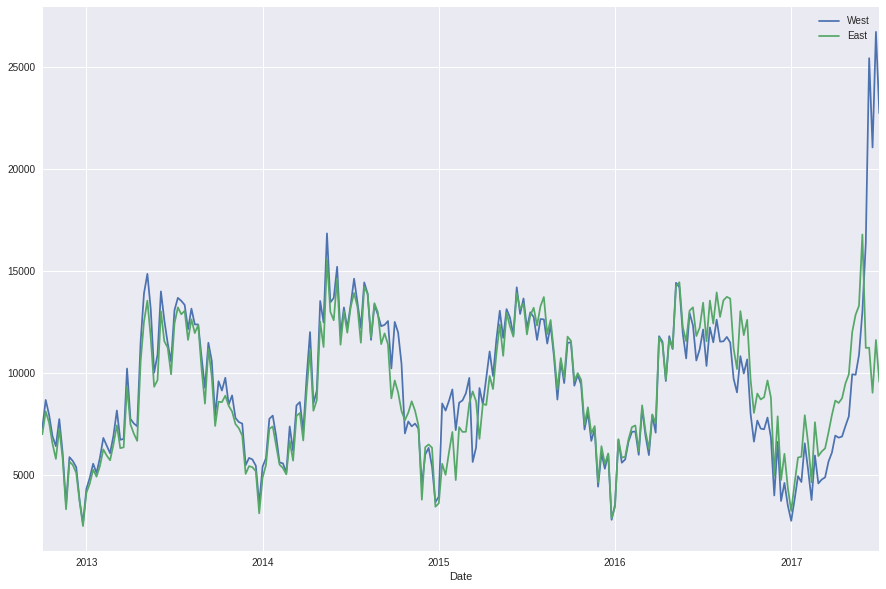

In [6]:
data.columns = ['West', 'East']
data.resample('W').sum().plot()

Now one thing you might want to do is see if
there's any sort of annual trend in the
number of riders, any sort of annual
growth or decline and ridership. We can create a 
rolling window. So let's resample and
do a rolling sum of over  days of all
the data and what comes out there is
kind of the annual trend each of these
points is the sum of rides in the
previous days.

<AxesSubplot:xlabel='Date'>

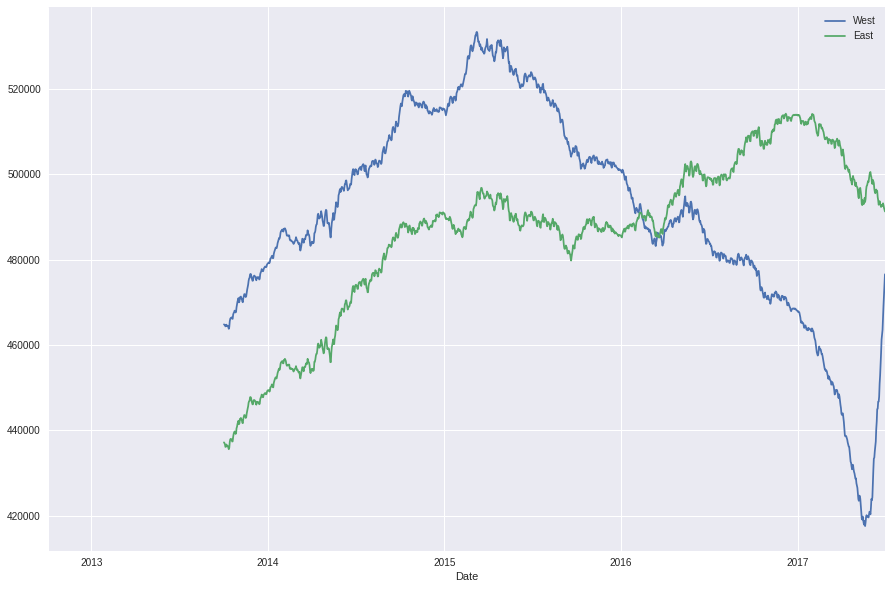

In [7]:
data.resample('D').sum().rolling(365).sum().plot()

We see something interesting, on the west
side things got increased and then sort of decreased. These axes limits are a little bit
suspect because they don't go all the
way to 0 so it might be better if we can set the Y axis to use the current maximum.

(0.0, 539148.3)

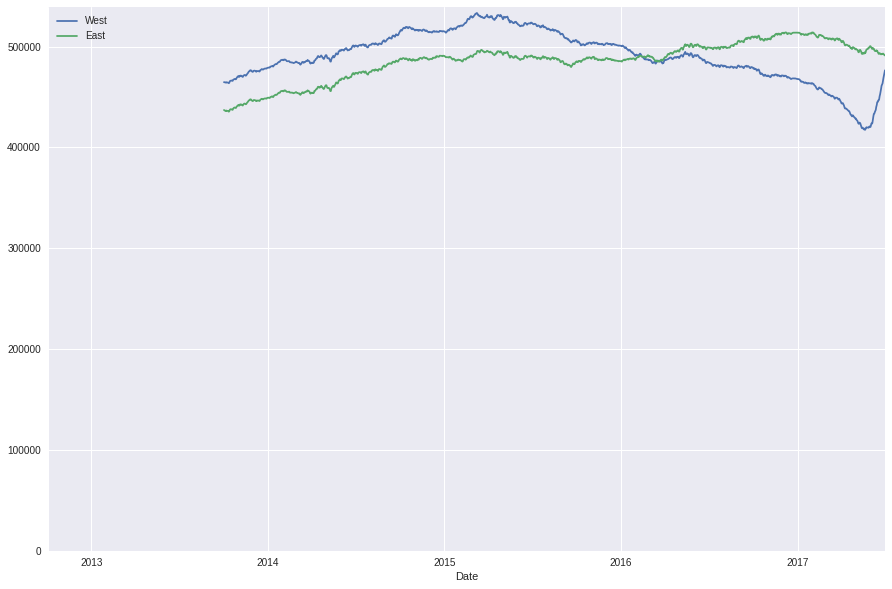

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

We can see that the change is not as
dramatic but there is some change, but
there seems to be an offset here between
the west side walk and the east side
walk. So another thing we can do is that we
can say data total equals data West plus
data East, so let's just add a new column to
the data and then we we can plot.

(0.0, 1059460.05)

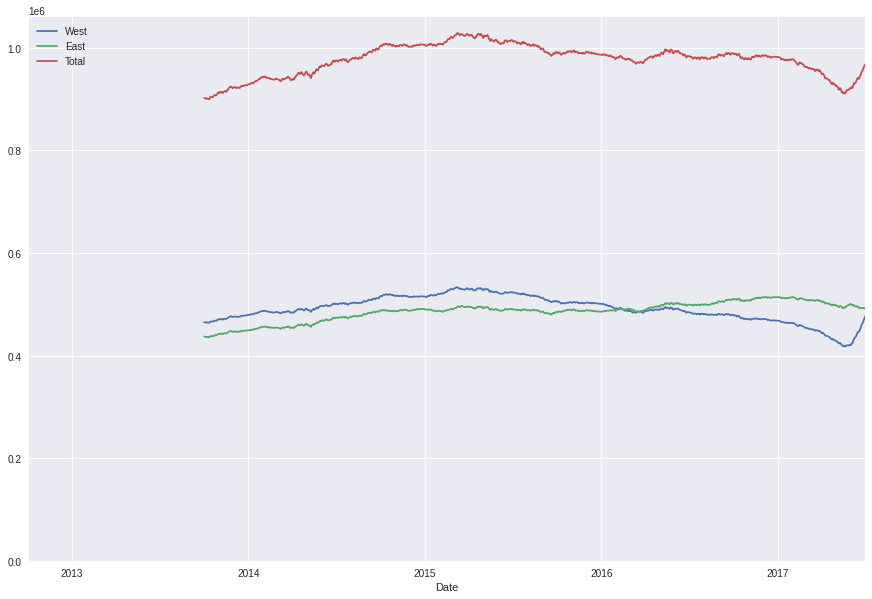

In [9]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

We can see that somehow that the East
Side and west side of the bridge have
kind of slipped a little bit, i.e., the trends
are reversed so that the the total
counts of biker bikes across the bridge
hover right around one million per year or something like that.
That's been pretty consistent for the
past few years plus or minus a few
percent.

Another thing that we can do is that we can take a look at the
trend within individual days. So we will take a look at "group by" here
and let's group by the time of day
and take the mean and then plot it to
see what that looks like.

<AxesSubplot:xlabel='time'>

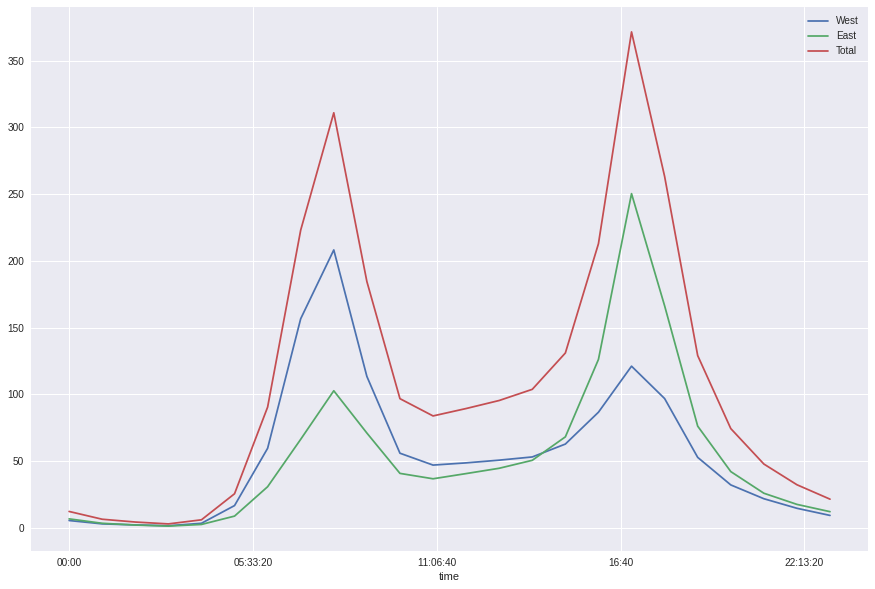

In [10]:
data.groupby(data.index.time).mean().plot()

This (the plot above) is the over each time of day throughout the
year. We (through all the days) calculate the average of
the number of crossings of each time of
day and we see some interesting patterns.
First, the eastbound sidewalk seems to
peak in the afternoon and the westbound
sidewalk peeks in the morning and these
two peaks here are kind of indicative of
a commute pattern, i.e., people
going into the city into the city on the
west bound on the West Side walk in the
morning and out of the city on the east
side block in the afternoon generally. 

Now this average is nice but it would
also be nice to kind of see the whole
data set in this way. One way we can
do that is with something called a "pivot
table". So let's make a pivoted data set
and the data pivot table. 

In [11]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

If we look at just the first five by five
block of this pivoted data, we can see
what we've done we now have a two
dimensional data frame where each column
is a day in the data set and each row
corresponds to an hour during that day.

In [12]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


Let's take a look at that that data we plot it we want we don't want a
legend so we're going to say legend equals false and take a look at what comes out.

<AxesSubplot:xlabel='time'>

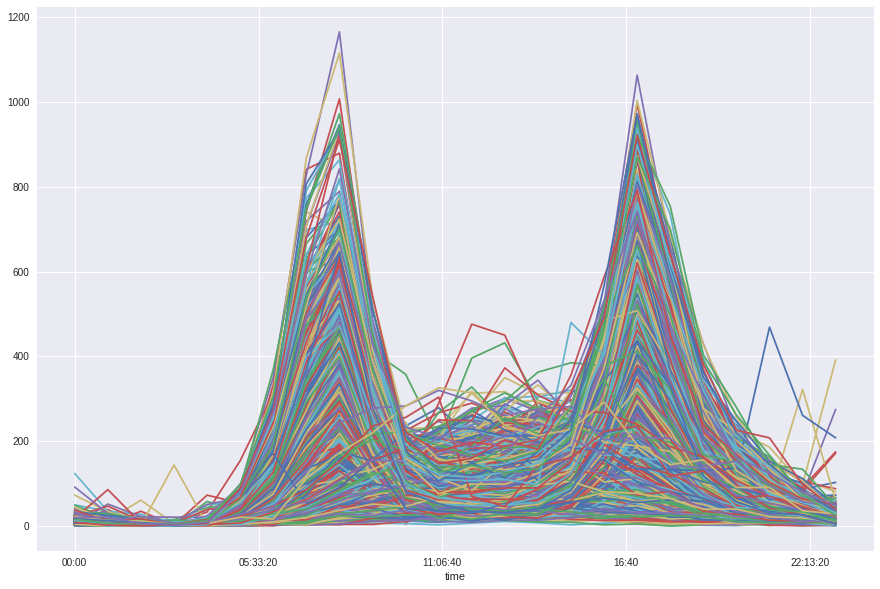

In [13]:
pivoted.plot(legend=False)

what we see here is that we have a line now for each
day of the year or each day in the four years and it's up maybe a little bit
hard to see so let's try doing alpha equals 0.01. This is the transparency so
we're going to plot a whole bunch of transparent lines on top of each other to get an idea of how the trend in
crossings over the day changes throughout this four year period.

<AxesSubplot:xlabel='time'>

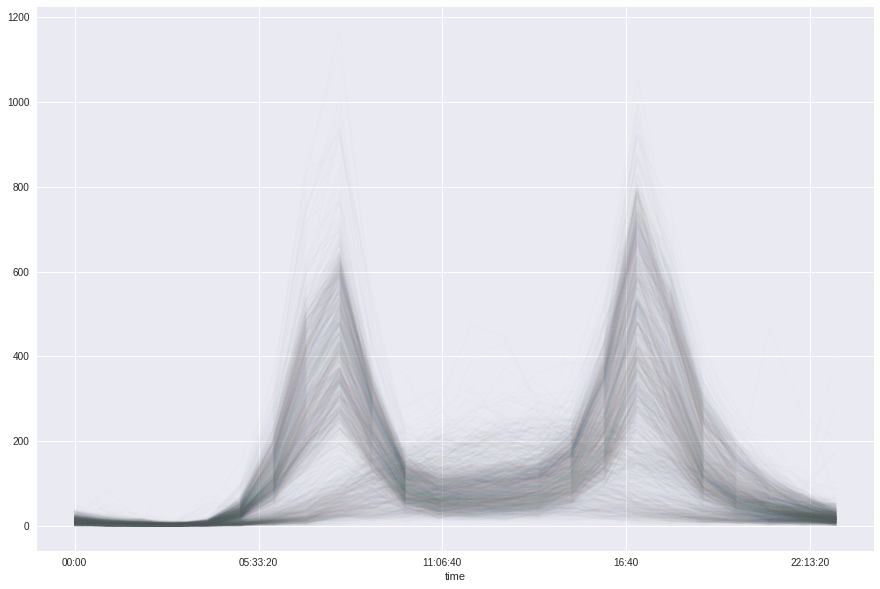

In [14]:
pivoted.plot(legend=False, alpha=0.01)

We can see that there's a bunch of days that have this kind of
commute this bimodal commute pattern but there are also a bunch of days that
don't have a commute pattern they kind of go and peak somewhere mid day and
then go down during the rest of the day. Hence, the the best hypothesis here
is that these commute days would be weekdays and these broad usage days
would be weekends or holidays.